In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [2]:
train_dir = "FER13/train"
#passing the path with training images
test_dir = "FER13/test"

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [7]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

C:\Users\Public\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
epochs = 100
batch_size = 64

In [9]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100
359/359 [==============================] - 108s 273ms/step - loss: 9.3044 - accuracy: 0.1882 - val_loss: 8.5628 - val_accuracy: 0.2123
Epoch 2/100
359/359 [==============================] - 25s 69ms/step - loss: 8.3237 - accuracy: 0.2072 - val_loss: 7.6144 - val_accuracy: 0.2633
Epoch 3/100
359/359 [==============================] - 22s 62ms/step - loss: 7.3459 - accuracy: 0.2322 - val_loss: 6.6588 - val_accuracy: 0.2905
Epoch 4/100
359/359 [==============================] - 22s 63ms/step - loss: 6.4066 - accuracy: 0.2527 - val_loss: 5.7228 - val_accuracy: 0.3226
Epoch 5/100
359/359 [==============================] - 24s 68ms/step - loss: 5.5078 - accuracy: 0.2878 - val_loss: 5.0976 - val_accuracy: 0.3010
Epoch 6/100
359/359 [==============================] - 23s 64ms/step - loss: 4.7475 - accuracy: 0.3267 - val_loss: 4.4828 - val_accuracy: 0.3108
Epoch 7/100
359/359 [==============================] - 23s 64ms/step - loss: 4.1224 - accuracy: 0.3512 - val_loss: 3.9360 - val_

359/359 [==============================] - 54s 149ms/step - loss: 1.3352 - accuracy: 0.6688 - val_loss: 1.3740 - val_accuracy: 0.6557
Epoch 57/100
359/359 [==============================] - 58s 162ms/step - loss: 1.3377 - accuracy: 0.6702 - val_loss: 1.3672 - val_accuracy: 0.6774
Epoch 58/100
359/359 [==============================] - 116s 322ms/step - loss: 1.3334 - accuracy: 0.6705 - val_loss: 1.4079 - val_accuracy: 0.6578
Epoch 59/100
359/359 [==============================] - 117s 326ms/step - loss: 1.3365 - accuracy: 0.6706 - val_loss: 1.3680 - val_accuracy: 0.6690
Epoch 60/100
359/359 [==============================] - 115s 319ms/step - loss: 1.3341 - accuracy: 0.6699 - val_loss: 1.3913 - val_accuracy: 0.6606
Epoch 61/100
359/359 [==============================] - 118s 327ms/step - loss: 1.3327 - accuracy: 0.6711 - val_loss: 1.3755 - val_accuracy: 0.6606
Epoch 62/100
359/359 [==============================] - 65s 180ms/step - loss: 1.3303 - accuracy: 0.6738 - val_loss: 1.3883 - v

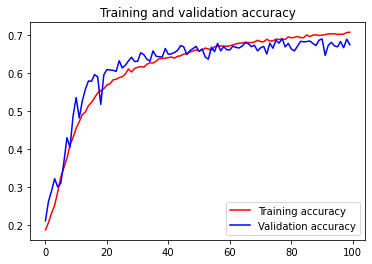

<Figure size 432x288 with 0 Axes>

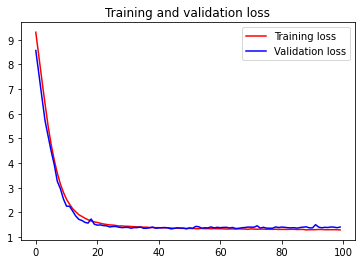

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [11]:
model.save('model_fer2013_val67.h5')

In [12]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 28ms/step - loss: 1.4019 - accuracy: 0.6739
final train accuracy = 77.22 , validation accuracy = 67.39


(48, 48)


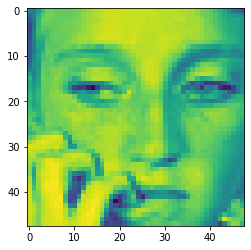

In [14]:
img = image.load_img("/kaggle/input/fer2013/test/fear/PrivateTest_11014592.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [15]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [16]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 1.0, 0.0, 0.0, 6.3208744e-21, 0.0]


In [17]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [18]:
model.save_weights('model_weights.h5')